In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

FOLDER = "./data/"
CSV_FILE = "Llama-3.1-8B-Instruct-ultrachat_200k-Llama-3-8B-Instruct-with-thanks-energy-2025-05-31-10-44-37.csv"
df = pd.read_csv(FOLDER + CSV_FILE)

df

,Unnamed: 0,model,dataset,split,column,prompt_tokens,response_tokens,duration_prefill,duration_generate,duration_decode,energy_prefill_cpu,energy_prefill_gpu,energy_prefill_ram,energy_generate_cpu,energy_generate_gpu,energy_generate_ram,energy_decode_cpu,energy_decode_gpu,energy_decode_ram
0,0,meta-llama/Llama-3.1-8B-Instruct,jdelavande/ultrachat_200k-Llama-3-8B-Instruct-...,train,conversation_with_thanks,683,47,0.243993,1.374374,1.130381,0.000004,0.000043,0.000003,0.000018,0.000141,0.000015,0.000014,0.000098,0.000012
1,1,meta-llama/Llama-3.1-8B-Instruct,jdelavande/ultrachat_200k-Llama-3-8B-Instruct-...,train,conversation_with_thanks,1488,45,0.499466,1.581464,1.081998,0.000007,0.000089,0.000006,0.000020,0.000196,0.000017,0.000014,0.000108,0.000011
2,2,meta-llama/Llama-3.1-8B-Instruct,jdelavande/ultrachat_200k-Llama-3-8B-Instruct-...,train,conversation_with_thanks,2999,69,0.956044,2.804570,1.848526,0.000013,0.000178,0.000011,0.000036,0.000374,0.000030,0.000023,0.000196,0.000020
3,3,meta-llama/Llama-3.1-8B-Instruct,jdelavande/ultrachat_200k-Llama-3-8B-Instruct-...,train,conversation_with_thanks,410,38,0.147575,1.058437,0.910862,0.000002,0.000031,0.000002,0.000014,0.000110,0.000012,0.000011,0.000080,0.000010
4,4,meta-llama/Llama-3.1-8B-Instruct,jdelavande/ultrachat_200k-Llama-3-8B-Instruct-...,train,conversation_with_thanks,2156,53,0.764414,2.056390,1.291976,0.000010,0.000143,0.000009,0.000026,0.000281,0.000022,0.000016,0.000138,0.000014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6424,6424,meta-llama/Llama-3.1-8B-Instruct,jdelavande/ultrachat_200k-Llama-3-8B-Instruct-...,train,conversation_with_thanks,1106,78,0.357004,2.332691,1.975688,0.000005,0.000071,0.000004,0.000030,0.000253,0.000025,0.000025,0.000182,0.000021
6425,6425,meta-llama/Llama-3.1-8B-Instruct,jdelavande/ultrachat_200k-Llama-3-8B-Instruct-...,train,conversation_with_thanks,1421,45,0.458159,1.574565,1.116406,0.000006,0.000091,0.000005,0.000020,0.000199,0.000017,0.000014,0.000109,0.000012
6426,6426,meta-llama/Llama-3.1-8B-Instruct,jdelavande/ultrachat_200k-Llama-3-8B-Instruct-...,train,conversation_with_thanks,490,34,0.167005,0.998587,0.831582,0.000003,0.000032,0.000002,0.000013,0.000103,0.000011,0.000010,0.000071,0.000009
6427,6427,meta-llama/Llama-3.1-8B-Instruct,jdelavande/ultrachat_200k-Llama-3-8B-Instruct-...,train,conversation_with_thanks,2117,39,0.762934,1.736081,0.973147,0.000010,0.000141,0.000009,0.000022,0.000238,0.000019,0.000012,0.000097,0.000010


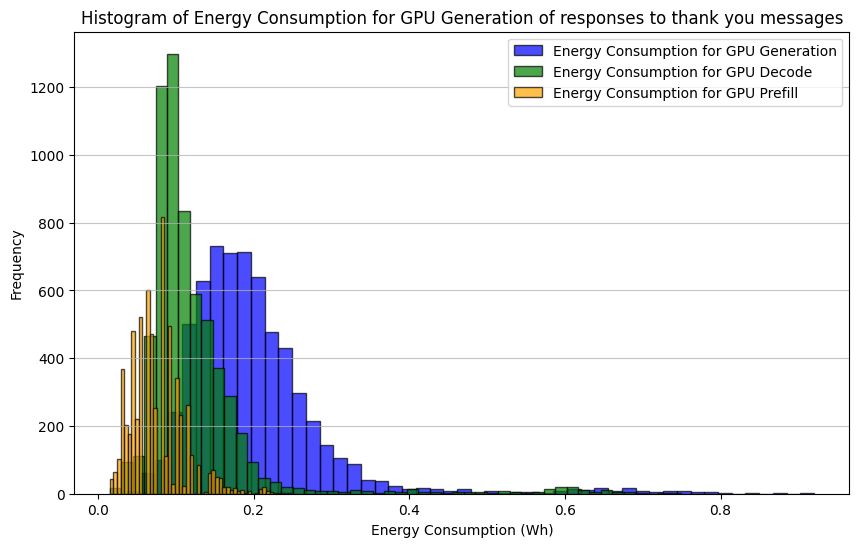

In [ ]:
# histogram
plt.figure(figsize=(10, 6))
plt.hist(df['energy_generate_gpu']*1000, bins=50, color='blue', alpha=0.7, edgecolor='black', label='Energy Consumption for GPU Generation')
plt.hist(df['energy_decode_gpu']*1000, bins=50, color='green', alpha=0.7, edgecolor='black', label='Energy Consumption for GPU Decode')
plt.hist(df['energy_prefill_gpu']*1000, bins=50, color='orange', alpha=0.7, edgecolor='black', label='Energy Consumption for GPU Prefill')
plt.legend(loc='upper right')
plt.title('Histogram of Energy Consumption for GPU Generation of responses to thank you messages')
plt.xlabel('Energy Consumption (Wh)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

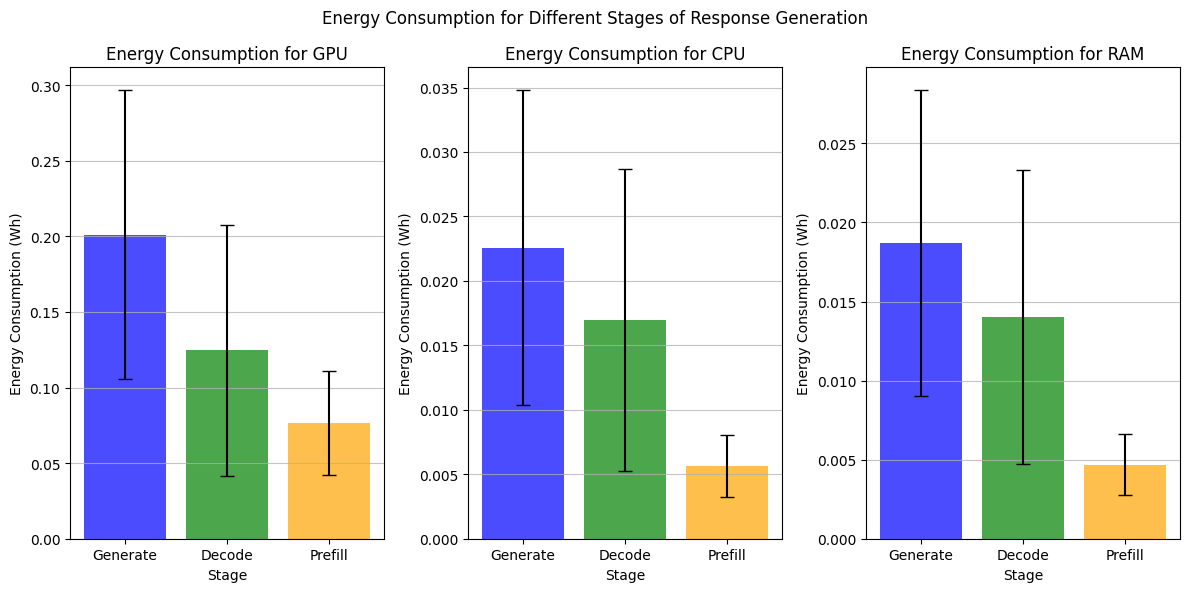

In [18]:
fig, ax = plt.subplots(1, 3, figsize=(12, 6))
x_pos = np.arange(3)

for i, device in enumerate(['gpu', 'cpu', 'ram']):
    ax[i].bar(x_pos,
            [df[f'energy_generate_{device}'].mean()*1000, df[f'energy_decode_{device}'].mean()*1000, df[f'energy_prefill_{device}'].mean()*1000],
            yerr=[df[f'energy_generate_{device}'].std()*1000, df[f'energy_decode_{device}'].std()*1000, df[f'energy_prefill_{device}'].std()*1000],
            capsize=5, color=['blue', 'green', 'orange'], alpha=0.7)
    ax[i].set_xticks(x_pos)
    ax[i].set_xticklabels(['Generate', 'Decode', 'Prefill'])
    ax[i].set_ylabel('Energy Consumption (Wh)')
    ax[i].set_xlabel('Stage')
    ax[i].grid(axis='y', alpha=0.75)
    ax[i].set_title(f'Energy Consumption for {device.upper()}')
ax[0].set_title('Energy Consumption for GPU')
ax[1].set_title('Energy Consumption for CPU')
ax[2].set_title('Energy Consumption for RAM')
plt.suptitle('Energy Consumption for Different Stages of Response Generation')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit the suptitle
plt.tight_layout()
plt.show()


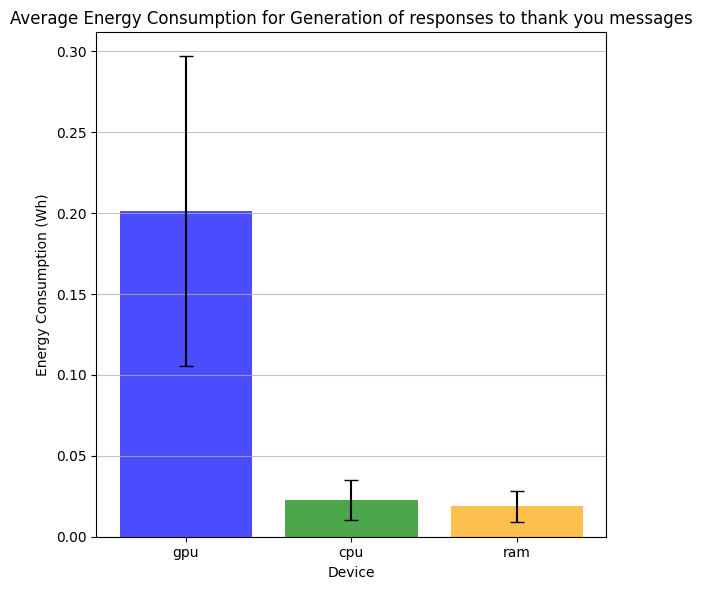

In [13]:
fig, ax = plt.subplots(figsize=(6, 6))
x_pos = np.arange(3)
ax.bar(x_pos,
        [df['energy_generate_gpu'].mean()*1000, df['energy_generate_cpu'].mean()*1000, df['energy_generate_ram'].mean()*1000],
        yerr=[df['energy_generate_gpu'].std()*1000, df['energy_generate_cpu'].std()*1000, df['energy_generate_ram'].std()*1000],
        capsize=5, color=['blue', 'green', 'orange'], alpha=0.7)
ax.set_xticks(x_pos)
ax.set_xticklabels(['gpu', 'cpu', 'ram'])
ax.set_title('Average Energy Consumption for Generation of responses to thank you messages')
ax.set_ylabel('Energy Consumption (Wh)')
ax.set_xlabel('Device')
ax.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

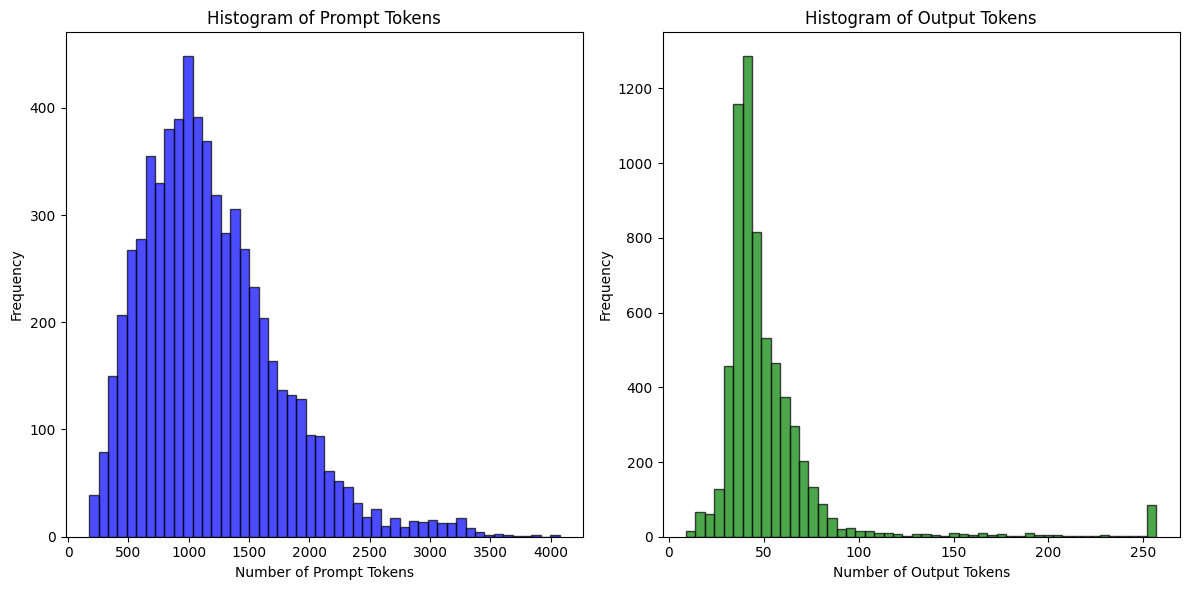

In [19]:
# hist of prompt tokens and output tokens
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].hist(df['prompt_tokens'], bins=50, color='blue', alpha=0.7, edgecolor='black')
ax[0].set_title('Histogram of Prompt Tokens')
ax[0].set_xlabel('Number of Prompt Tokens')
ax[0].set_ylabel('Frequency')
ax[1].hist(df['response_tokens'], bins=50, color='green', alpha=0.7, edgecolor='black')
ax[1].set_title('Histogram of Output Tokens')
ax[1].set_xlabel('Number of Output Tokens')
ax[1].set_ylabel('Frequency')
plt.tight_layout()
plt.show()